The results of the under-sampled SVM model is promising. 

There is scope of increasing the efficiency of the SVM model by reducing the number of features which required to train the model. 

Even though PCA was applied before to extract the meaningful features, there is a chance that some of these features are not required for the clasification.

The Recursive Feature Elimination (RFE) algorithm can be applied here to reduce the feature set without compromising too much on the accuracy.

Number of features remaining: 30
The accuracy for the model is: 93.4959349593496%
Number of features remaining: 29
The accuracy for the model is: 93.4959349593496%
Number of features remaining: 28
The accuracy for the model is: 93.4959349593496%
Number of features remaining: 27
The accuracy for the model is: 94.71544715447155%
Number of features remaining: 26
The accuracy for the model is: 93.4959349593496%
Number of features remaining: 25
The accuracy for the model is: 93.4959349593496%
Number of features remaining: 24
The accuracy for the model is: 93.08943089430895%
Number of features remaining: 23
The accuracy for the model is: 93.4959349593496%
Number of features remaining: 22
The accuracy for the model is: 92.27642276422763%
Number of features remaining: 21
The accuracy for the model is: 94.3089430894309%
Number of features remaining: 20
The accuracy for the model is: 93.4959349593496%
Number of features remaining: 19
The accuracy for the model is: 94.71544715447155%
Number of fe

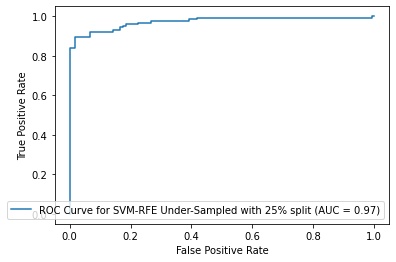

Curves of Complete Data Test


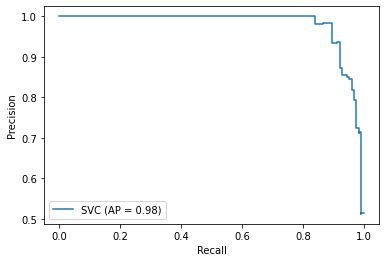

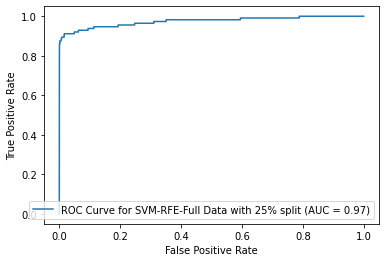

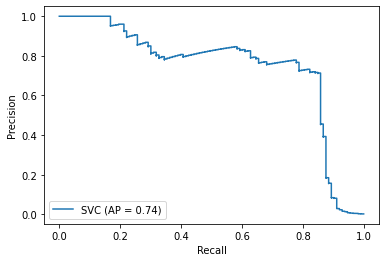

In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 25 20:36:32 2020

@author: yash
"""
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

threshold = 92
accuracy = 93
diff = 0
data_colm = [0, 1, 2, 3, 4, 5 ,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

while accuracy > threshold and len(data_colm)>=5:
    dataset = pd.read_csv('creditcard.csv')
    
    No_of_frauds= len(dataset[dataset["Class"]==1])
    normal_index= dataset[dataset["Class"]==0].index
    random_normal_indices= np.random.choice(normal_index, No_of_frauds, replace= False)
    random_normal_indices= np.array(random_normal_indices)
    
    fraud_index= np.array(dataset[dataset["Class"]==1].index)
    
    undersampled_indices= np.concatenate([fraud_index, random_normal_indices])
    undersampled_data= dataset.iloc[undersampled_indices, :]
    
    X = undersampled_data.iloc[:, data_colm].values
    Y = undersampled_data.iloc[:, 30].values
    
    X_full = dataset.iloc[:, data_colm].values
    Y_full = dataset.iloc[:, 30].values
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, shuffle=True, random_state = 42,  stratify = None)
    X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y_full, test_size = 0.25, shuffle=True, random_state = 42,  stratify = None)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    X_full_test = sc.transform(X_full_test)
    
    model = SVC(C = 0.25 , kernel = 'linear')
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    individual_weights = model.coef_
    individual_weights = individual_weights.flatten()
    individual_weights = abs(individual_weights)
#    print("The weights of the features are: "+str(individual_weights))
        
    conf_matrix = confusion_matrix(Y_test, Y_pred)
        
    accuracy = (accuracy_score(Y_test, Y_pred))*100
    print("Number of features remaining: {}".format(len(data_colm)))
    print("The accuracy for the model is: "+str(accuracy)+"%")
        
    min_weight = min(individual_weights)
    #    print(min_weight)
    min_weight_index_temp = np.argwhere(individual_weights==min_weight)
    #    print(min_weight_index_temp)
    min_weight_index = min_weight_index_temp.flatten()
     
    #    print(min_weight_index[0])
    data_colm.pop(min_weight_index[0])
    #    print(data_colm)


print("Model results")
print("Confusion Matrix of model data")
print(conf_matrix)
print("Classification report of model data")
print(classification_report(Y_test, Y_pred))

Y_full_pred = model.predict(X_full_test)
print("Accuracy of whole data")
print(accuracy_score(Y_full_test, Y_full_pred))
print("Confusion Matrix of whole data")
print(confusion_matrix(Y_full_test, Y_full_pred))
print("Classification report of whole data")
print(classification_report(Y_full_test, Y_full_pred))



print("Curves of Under-Sampled Data")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle = True, random_state=42, stratify=None)
plot_roc_curve(model, X_test, Y_test, name='ROC Curve for SVM-RFE Under-Sampled with 25% split')
plt.show()

disp = plot_precision_recall_curve(model, X_test, Y_test)
    


print("Curves of Complete Data Test")

X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y_full, test_size = 0.25, shuffle=True, random_state = 42,  stratify = None)
plot_roc_curve(model, X_full_test, Y_full_test, name='ROC Curve for SVM-RFE-Full Data with 25% split')
plt.show()

    
disp1 = plot_precision_recall_curve(model,X_full_test, Y_full_test)


Therefore, we have reduced the number of feature set from 30 features to 5 features with little impact on the balalnced accuracy, recall of the model. Although, the data split here is random. Hence, varying results may acheive.

Hence, the SVM-RFE model should be well optimized and tested before it is used for actual classification.